## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [10]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
len(folders)

3

In [14]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')


Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
from PIL import Image


In [20]:
import scipy

In [21]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_9564\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50


2/2 [==============================] - 12s 5s/step - loss: 4.6299 - accuracy: 0.3281 - val_loss: 4.8421 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 8.8050 - accuracy: 0.4219 - val_loss: 2.8837 - val_accuracy: 0.5862
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 3.7886 - accuracy: 0.5312 - val_loss: 4.6104 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 3.9915 - accuracy: 0.3594 - val_loss: 3.6085 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 2.0780 - accuracy: 0.4688 - val_loss: 1.5723 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 6s 5s/step - loss: 2.4779 - accuracy: 0.4375 - val_loss: 2.2727 - val_accuracy: 0.4138
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 2.2443 - accuracy: 0.5156 - val_loss: 1.1568 - val_accuracy: 0.6207
Epoch 8/50
2/2 [======================

In [23]:
r.history

{'loss': [4.6298956871032715,
  8.804980278015137,
  3.7886219024658203,
  3.991497039794922,
  2.078017234802246,
  2.4778597354888916,
  2.2443299293518066,
  1.1526093482971191,
  1.6667050123214722,
  1.0199365615844727,
  1.3160936832427979,
  0.7459089756011963,
  0.9618629813194275,
  0.5623393058776855,
  0.707923173904419,
  0.4445372223854065,
  0.4792839586734772,
  0.44288232922554016,
  0.4989350736141205,
  0.4258790612220764,
  0.377069890499115,
  0.38497424125671387,
  0.3246229588985443,
  0.33037328720092773,
  0.34453046321868896,
  0.3313855230808258,
  0.3419917821884155,
  0.3609504699707031,
  0.30082958936691284,
  0.2568995952606201,
  0.31751343607902527,
  0.2711164355278015,
  0.2501780390739441,
  0.26888805627822876,
  0.2625686228275299,
  0.27081727981567383,
  0.23079387843608856,
  0.2559360861778259,
  0.22351990640163422,
  0.22871355712413788,
  0.3161202073097229,
  0.2254636287689209,
  0.24734120070934296,
  0.22156274318695068,
  0.240532159805

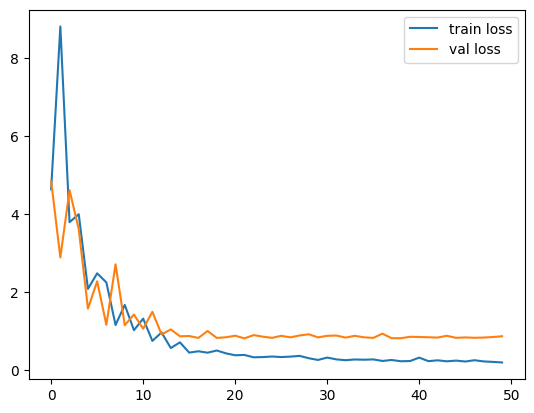

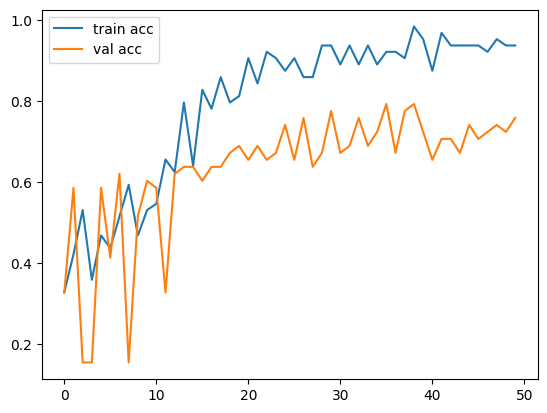

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\PROJECTS\GIT_Filess\Deep-Learning-Car-Brand\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:

y_pred = model.predict(test_set)


2/2 [==============================] - 4s 1s/step


In [27]:
y_pred

array([[2.05517630e-03, 5.29134691e-01, 4.68810111e-01],
       [1.59827009e-01, 2.01550201e-01, 6.38622820e-01],
       [2.22692806e-02, 6.51919341e-04, 9.77078736e-01],
       [5.56555996e-03, 6.00400805e-01, 3.94033670e-01],
       [1.82885546e-02, 4.77939248e-01, 5.03772140e-01],
       [8.29359124e-05, 9.93716300e-01, 6.20081322e-03],
       [4.29034350e-04, 9.92377400e-01, 7.19358539e-03],
       [1.00301625e-02, 6.27022147e-01, 3.62947762e-01],
       [1.06325187e-02, 5.07409692e-01, 4.81957823e-01],
       [1.64653391e-01, 5.14760494e-01, 3.20586115e-01],
       [1.45948790e-02, 6.55252635e-01, 3.30152452e-01],
       [4.16655792e-03, 9.46651220e-01, 4.91822436e-02],
       [2.45420175e-04, 9.85714316e-01, 1.40402662e-02],
       [1.09763665e-03, 9.49324608e-01, 4.95778248e-02],
       [8.81634373e-03, 9.02015209e-01, 8.91684964e-02],
       [6.36214344e-03, 3.54177684e-01, 6.39460206e-01],
       [6.56585069e-03, 8.87697756e-01, 1.05736390e-01],
       [9.93784051e-03, 2.64757

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_resnet50.h5')

In [30]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [31]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [32]:
x.shape


(224, 224, 3)

In [33]:
x=x/255


In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.25665 , -116.04175 , -122.91921 ],
         [-103.16645 , -115.95939 , -122.83686 ],
         [-103.06449 , -115.85743 , -122.7349  ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.025276, -115.818214, -122.71137 ],
         [-103.025276, -115.82998 , -122.719215],
         [-103.0292  , -115.8339  , -122.72314 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.993904, -115.80645 , -122.719215],
         [-102.96645 , -115.79861 , -122.72314 ],
         [-102.96645 , -115.79861 , -122.72314 ]],

        ...,

        [[-103.04096 , -115.97115 , -1

In [36]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [37]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.00830827, 0.07581527, 0.9158765 ]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 117ms/step


In [39]:
a==1

array([False])

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1], dtype=int64)